# Activity 1 - Linear Model

This activity involves applying linear models to the NHL Top 100 Data Set. More specifically, plot the number of goals and assists of players on the x and y axis. Then we create an initial linear model, a linear model where the line passes through Wayne Gretzky, and a model where the lines passes through Patrick Kane. At the end, we change the models to make all the 3 lines pass through the origin, and  their desired points. We then analyze the r squared and p values of the models.

In [ ]:
# Load the required libraries
library(dplyr)
library(gdata)
library("broom")

In [253]:
# Load the data
data <- read.csv("NHLTop100.csv")

In [254]:
# Get a summary of the data
summary(data)

      Rank                      Player        Team    Pos     X1st.NHL.Season
 Min.   :  1.00   Adam Oates       : 1          :92   C:42   1980-1981:10    
 1st Qu.: 25.75   Al Macinnis      : 1   NJD    : 2   D:13   1979-1980: 7    
 Median : 50.50   Alex Delvecchio  : 1   BOS    : 1   L:15   1988-1989: 6    
 Mean   : 50.50   Alex Kovalev     : 1   CHI    : 1   R:30   1982-1983: 5    
 3rd Qu.: 75.25   Alexander Mogilny: 1   DAL    : 1          1984-1985: 5    
 Max.   :100.00   Andy Bathgate    : 1   DET    : 1          1990-1991: 5    
                  (Other)          :94   (Other): 2          (Other)  :62    
  Last.NHL.Season       GP             G               A         
 2012-2013:10     Min.   : 657   Min.   :185.0   Min.   : 421.0  
 2003-2004: 7     1st Qu.:1108   1st Qu.:391.0   1st Qu.: 585.0  
 2005-2006: 7     Median :1246   Median :470.5   Median : 700.5  
 2008-2009: 6     Mean   :1261   Mean   :475.4   Mean   : 741.8  
 1998-1999: 5     3rd Qu.:1408   3rd Qu.:550.8

In [255]:
# Create a data frame storing only Goals and Assists, and adding the data for Patrick Kane (283 goals, 459 assists)
#  Stats for Patrick Kane taken from the NHL website https://www.nhl.com/player/patrick-kane-8474141

ga <- data.frame(data$G,data$A)
head(ga)
nrow(ga)
ga <- rbind(ga,c(283,459))
nrow(ga)



data.G,data.A
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063


[1] 100

[1] 101

#### Create the linear model for the default dataset and plot it

In [319]:
model1 <- lm(data.G~data.A,ga)

In [320]:
model1


Call:
lm(formula = data.G ~ data.A, data = ga)

Coefficients:
(Intercept)       data.A  
   313.9864       0.2159  


In [321]:
summary(model1)


Call:
lm(formula = data.G ~ data.A, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.69  -86.94   11.68   91.23  286.70 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 313.98639   46.09619   6.812 7.58e-10 ***
data.A        0.21586    0.05983   3.608 0.000486 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486



Call:
lm(formula = data.G ~ data.A, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.69  -86.94   11.68   91.23  286.70 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 313.98639   46.09619   6.812 7.58e-10 ***
data.A        0.21586    0.05983   3.608 0.000486 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 99 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.1073 
F-statistic: 13.02 on 1 and 99 DF,  p-value: 0.000486


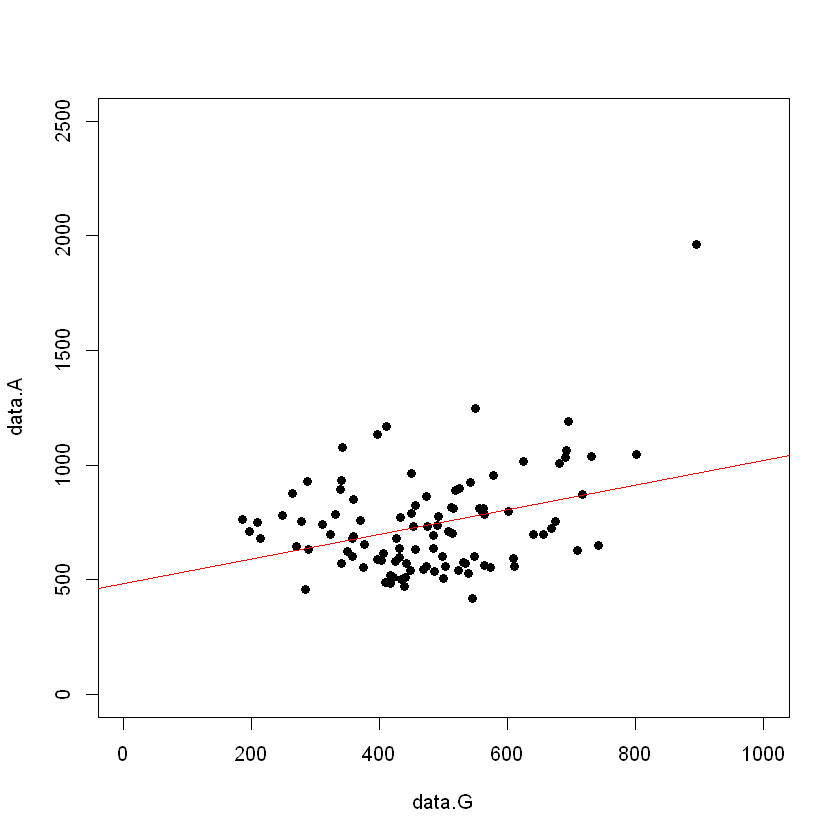

In [360]:
a <- NULL
plot(data.A~data.G,ga,pch=19,ylim=c(0,2500),xlim=c(0,1000))
abline(lm(data.A ~ data.G, data=ga),col="red")
summary(model1)
# values <- rbind(values,c("Original Linear Model",summary(model1)$r.squared,summary(model1)$coefficients[4]))
a <- data.frame(A=glance(model1)$r.squared, B=glance(model1)$p.value,C="Original Linear Model")


We can see the line above for the default Linear Model based on Goals and Assists

#### We create the Model for a line passing through Wayne Gretzky

In [361]:
model2 <- (lm(I(data.A-1963)~I(data.G-894)+0, ga))

b <- data.frame(A=glance(model2)$r.squared, B=glance(model2)$p.value,C="Line through Wayne Gretzky")
a <- rbind(a,b)





Call:
lm(formula = I(data.A - 1963) ~ I(data.G - 894) + 0, data = ga)

Residuals:
   Min     1Q Median     3Q    Max 
-902.9 -329.7 -141.1  121.8  700.4 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
I(data.G - 894)  2.68045    0.08412   31.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 374.1 on 100 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9094 
F-statistic:  1015 on 1 and 100 DF,  p-value: < 2.2e-16


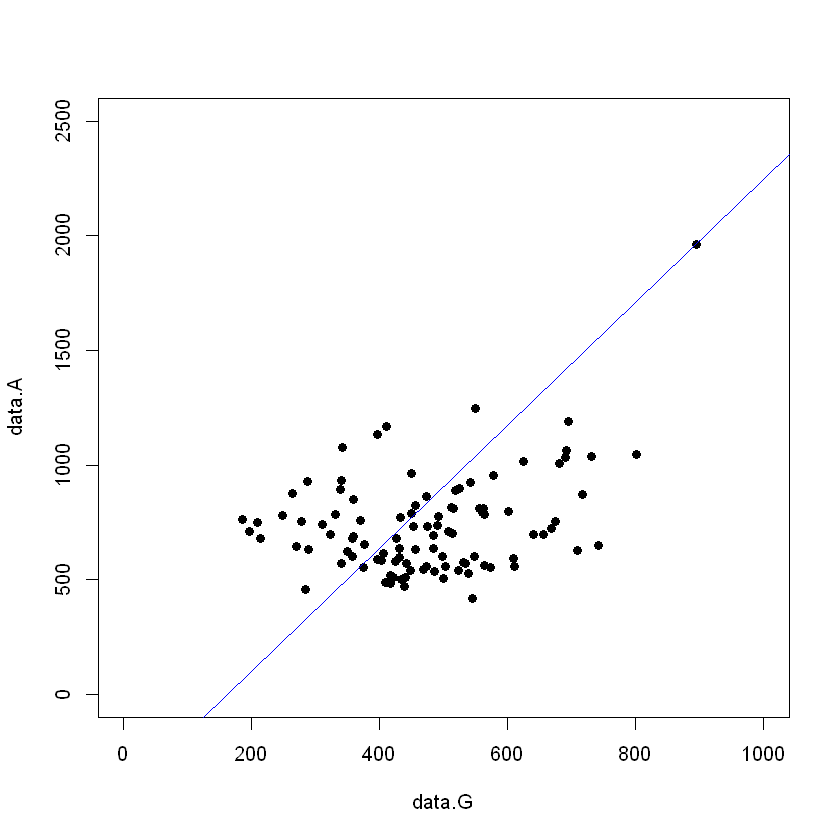

In [357]:
# Calculating intercept from above taking slope as 2.68045 from above, we get the intercept as 
# intercept = y - (slope * x) = 1963 - (2.68045 * 894) = 1963 - 2396.32 = -433.32 ~ -433

plot(data.A~data.G,ga,pch=19,ylim=c(0,2500),xlim=c(0,1000))
abline(a=-433,b=coef(model2),col="blue")  #Wayne Gretzky Line 

summary(model2)



We can see above the plot for the model where the line passes through Wayne Gretzky (894,1963)

### Creating a model and plotting a line through Patrick Kane 

In [362]:
model3 <- (lm(I(data.A-459)~I(data.G-283)+0, ga))   #model for Patrick Kane
# model2 <- (lm(data.A-1963~data.G-894 +0, ga))
summary(model3)
c <- data.frame(A=glance(model3)$r.squared, B=glance(model3)$p.value,C="Line through Patrick Kane")
a <- rbind(a,c)




Call:
lm(formula = I(data.A - 459) ~ I(data.G - 283) + 0, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
I(data.G - 283)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(data.A - 459) ~ I(data.G - 283) + 0, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
I(data.G - 283)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16


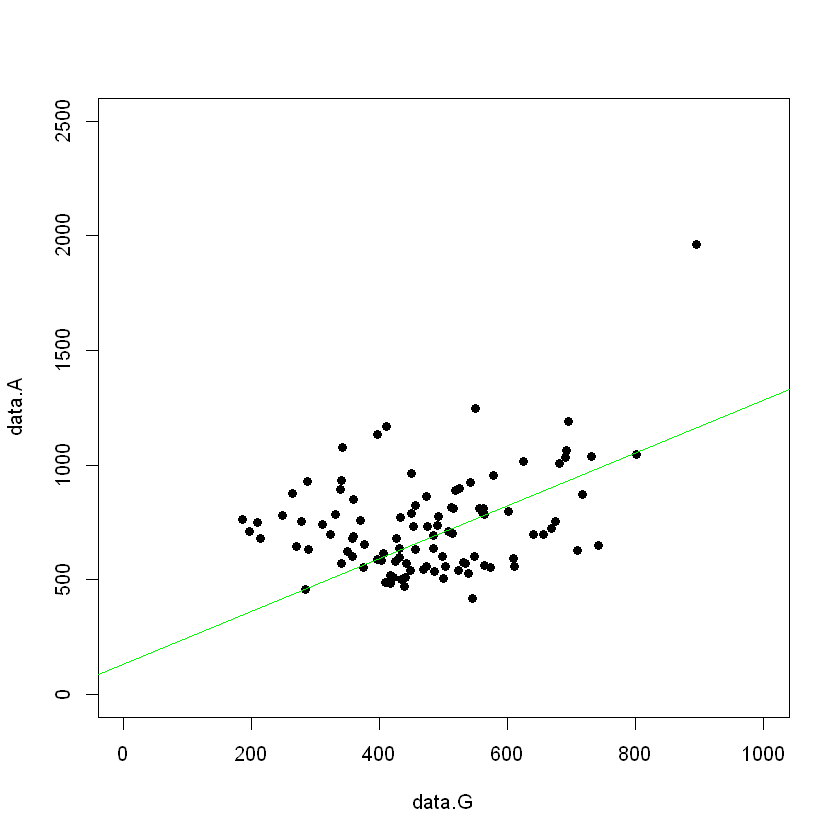

In [315]:
# Calculating intercept from above taking slope as 1.14959 from above, we get the intercept as 
# intercept = y - (slope * x) = 459 - (1.14959 * 283) = 459 - 325.33 = 133.66

plot(data.A~data.G,ga,pch=19,ylim=c(0,2500),xlim=c(0,1000))
abline(a=133.66,b=coef(model3),col="green")  #Patrick Kane Line   
summary(model3)



We can see that the green line in the plot above passes through Patrick Kane(283,459)

Now we shall pass all the three models through the origin, and their required points. This procedure involved a lot of
trial and error, through which we matched the slope of the resultant models with the actual slope 
(slope is calculated using 'y/x')


Call:
lm(formula = I(data.A + 370) ~ I(data.G) + 0, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-611.01 -121.94   30.46  225.82  725.80 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(data.G)  2.20109    0.06378   34.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 316.1 on 100 degrees of freedom
Multiple R-squared:  0.9225,	Adjusted R-squared:  0.9218 
F-statistic:  1191 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(data.A + 73) ~ I(data.G) + 0, data = ga)

Residuals:
    Min      1Q  Median      3Q     Max 
-479.58 -130.34   12.95  170.36  598.59 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
I(data.G)  1.62291    0.05216   31.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258.5 on 100 degrees of freedom
Multiple R-squared:  0.9064,	Adjusted R-squared:  0.9054 
F-statistic:   968 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = data.A ~ data.G - 1, data = ga)

Residuals:
   Min     1Q Median     3Q    Max 
-447.3 -137.1    3.6  157.9  639.2 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
data.G  1.48080    0.04977   29.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


A,B,C
0.1162053,4.860220e-04,Original Linear Model
0.9103454,3.543781e-54,Line through Wayne Gretzky
0.5808792,1.357532e-20,Line through Patrick Kane
0.9225345,2.362734e-57,Line through Wayne Gretzky and Origin
0.9063661,3.114661e-53,Line through Patrick Kane and Origin
0.8985172,1.750782e-51,Line using original LM and Origin


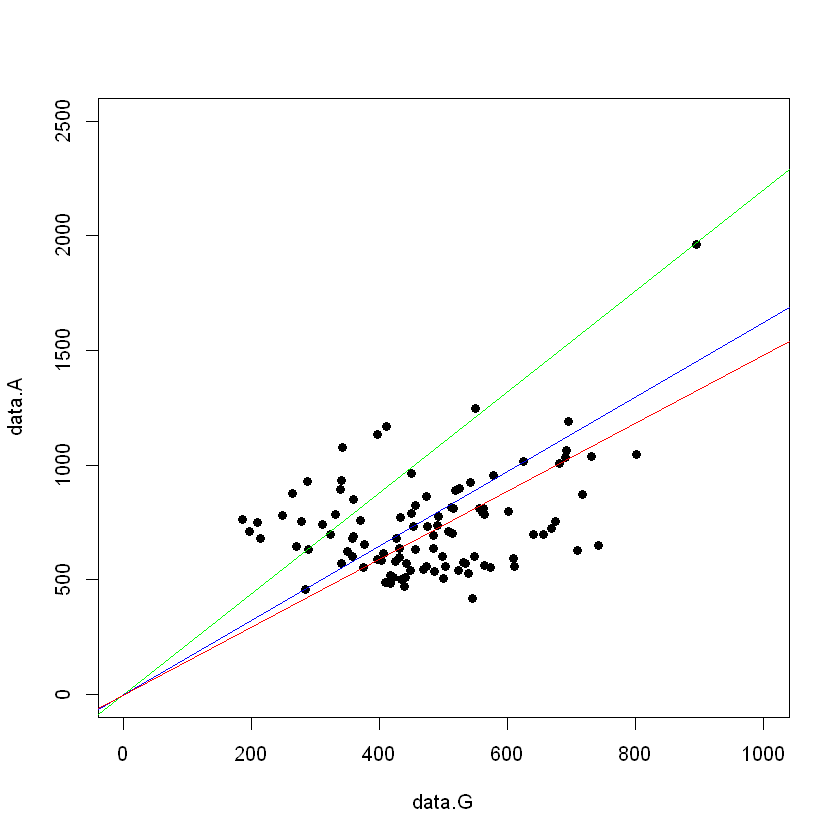

In [363]:
modelWGOrigin <- (lm(I(data.A+370)~I(data.G)+0, ga)) #model for Wayne Gretzky

modelPKOrigin<- (lm(I(data.A+73)~I(data.G)+0, ga))   #model for Patrick Kane

modelLMOrigin <- lm(data.A ~ data.G -1 , data=ga)   #model for Original Linear Model passing through Origin
# Note: the above line uses -1 after data.G so that we do not need an argument for the intercept with this line, as noted in
# https://www.zoology.ubc.ca/~schluter/R/fit-model/


plot(data.A~data.G,ga,pch=19,ylim=c(0,2500),xlim=c(0,1000))
abline(modelWGOrigin,col="green")
abline(modelPKOrigin,col="blue")
abline(modelLMOrigin,col="red")
summary(modelWGOrigin)
summary(modelPKOrigin)
summary(modelLMOrigin)
d<- data.frame(A=glance(modelWGOrigin)$r.squared, B=glance(modelWGOrigin)$p.value,C="Line through Wayne Gretzky and Origin")
e<- data.frame(A=glance(modelPKOrigin)$r.squared, B=glance(modelPKOrigin)$p.value,C="Line through Patrick Kane and Origin")
f<- data.frame(A=glance(modelLMOrigin)$r.squared, B=glance(modelLMOrigin)$p.value,C="Line using original LM and Origin")

a <- rbind(a,d)
a <- rbind(a,e)
a <- rbind(a,f)





We see the three models with their respective lines passing through the required points

In [370]:
# Storing values in a final table and changing column names
modelvalues <- a

gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: 'gdata'

The following objects are masked from 'package:dplyr':

    combine, first, last

The following object is masked from 'package:stats':

    nobs

The following object is masked from 'package:utils':

    object.size

The follow

In [371]:
modelvalues <- select(modelvalues,C,A,B)

In [373]:
modelvalues <- rename.vars(modelvalues,c("C","A","B"),c("Model","R-squared value","P-value"))


Changing in modelvalues                                   
From: C     A               B      
To:   Model R-squared value P-value



In [374]:
modelvalues

Model,R-squared value,P-value
Original Linear Model,0.1162053,4.860220e-04
Line through Wayne Gretzky,0.9103454,3.543781e-54
Line through Patrick Kane,0.5808792,1.357532e-20
Line through Wayne Gretzky and Origin,0.9225345,2.362734e-57
Line through Patrick Kane and Origin,0.9063661,3.114661e-53
Line using original LM and Origin,0.8985172,1.750782e-51


We can see from the above table that the best fitted model was the linear model for Wayne Gretzky(both the models). The fit of a model is determined by the R-squared value and p-values, where having a higher r-squared value is desired